# Car Price Prediction
This notebook is to analyse car prices dataset and build regression model to predict car prices. This exercise is to use multiple linear regression to predict car prices. The same exercise will continue in further notebooks with more advanced models.
<img src="https://imgd.aeplcdn.com/1056x594/n/cw/ec/27032/s60-exterior-right-front-three-quarter-3.jpeg?q=85" width ="300" height=300 >
<blockquote>Regression techniques to predict car prices.<br><b>Level: Beginner</b>
    <br><b>Author: Abhishek Sharma</b>
    <br></blockquote>
    <hr>


In [294]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [295]:
df_cars = pd.read_csv("imports-85.data",header=None)

In [296]:
display(df_cars)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [297]:
#Read Column Names
with open('imports-85.names') as f:
    print(f.read())

1. Title: 1985 Auto Imports Database

2. Source Information:
   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 19 May 1987
   -- Sources:
     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
        Automotive Yearbook.
     2) Personal Auto Manuals, Insurance Services Office, 160 Water
        Street, New York, NY 10038 
     3) Insurance Collision Report, Insurance Institute for Highway
        Safety, Watergate 600, Washington, DC 20037

3. Past Usage:
   -- Kibler,~D., Aha,~D.~W., \& Albert,~M. (1989).  Instance-based prediction
      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},
      51--57.
	 -- Predicted price of car using all numeric and Boolean attributes
	 -- Method: an instance-based learning (IBL) algorithm derived from a
	    localized k-nearest neighbor algorithm.  Compared with a
	    linear regression prediction...so all instances
	    with missing attribute values were discarded.  This res

In [298]:
header=['symboling','losses','makes','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_loc','wheel_base','len'
        ,'width','height','curb_weight','engine_type','num_cyl','engine_size','fuel_system','bore','stroke','comp_ratio',
        'horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [299]:
df_cars.columns=header

In [300]:
#dataframe with header
df_cars.head(3)

,symboling,losses,makes,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_loc,wheel_base,...,engine_size,fuel_system,bore,stroke,comp_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [301]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   losses        205 non-null    object 
 2   makes         205 non-null    object 
 3   fuel_type     205 non-null    object 
 4   aspiration    205 non-null    object 
 5   num_doors     205 non-null    object 
 6   body_style    205 non-null    object 
 7   drive_wheels  205 non-null    object 
 8   engine_loc    205 non-null    object 
 9   wheel_base    205 non-null    float64
 10  len           205 non-null    float64
 11  width         205 non-null    float64
 12  height        205 non-null    float64
 13  curb_weight   205 non-null    int64  
 14  engine_type   205 non-null    object 
 15  num_cyl       205 non-null    object 
 16  engine_size   205 non-null    int64  
 17  fuel_system   205 non-null    object 
 18  bore          205 non-null    

In [302]:
df_cars.losses.value_counts()
#There are 41 missing values
#replacing missing values with NaN
df_cars['losses'].replace('?',np.nan,inplace=True)
df_cars.losses=df_cars.losses.astype({'losses': 'float64'})
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   losses        164 non-null    float64
 2   makes         205 non-null    object 
 3   fuel_type     205 non-null    object 
 4   aspiration    205 non-null    object 
 5   num_doors     205 non-null    object 
 6   body_style    205 non-null    object 
 7   drive_wheels  205 non-null    object 
 8   engine_loc    205 non-null    object 
 9   wheel_base    205 non-null    float64
 10  len           205 non-null    float64
 11  width         205 non-null    float64
 12  height        205 non-null    float64
 13  curb_weight   205 non-null    int64  
 14  engine_type   205 non-null    object 
 15  num_cyl       205 non-null    object 
 16  engine_size   205 non-null    int64  
 17  fuel_system   205 non-null    object 
 18  bore          205 non-null    

In [303]:
df_cars.head(5)

,symboling,losses,makes,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_loc,wheel_base,...,engine_size,fuel_system,bore,stroke,comp_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [304]:
df_cars.makes.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
mercury           1
Name: makes, dtype: int64

In [305]:
#toyota has the highest number of cars

In [306]:
df_cars.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [307]:
df_cars.num_doors.value_counts()
#there are 2 missing values

four    114
two      89
?         2
Name: num_doors, dtype: int64

In [308]:
df_cars.body_style.value_counts()
#sedan and hatchback are most

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [309]:
df_cars.drive_wheels.value_counts()

fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int64

In [310]:
df_cars.engine_loc.value_counts()

front    202
rear       3
Name: engine_loc, dtype: int64

In [311]:
df_cars.engine_type.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [312]:
df_cars.num_cyl.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cyl, dtype: int64

In [313]:
df_cars.fuel_system.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel_system, dtype: int64

In [314]:
df_cars.bore.value_counts()
df_cars.bore.replace('?',np.nan,inplace=True)
df_cars.bore = df_cars.bore.astype('float64')
#has missing values

In [315]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   losses        164 non-null    float64
 2   makes         205 non-null    object 
 3   fuel_type     205 non-null    object 
 4   aspiration    205 non-null    object 
 5   num_doors     205 non-null    object 
 6   body_style    205 non-null    object 
 7   drive_wheels  205 non-null    object 
 8   engine_loc    205 non-null    object 
 9   wheel_base    205 non-null    float64
 10  len           205 non-null    float64
 11  width         205 non-null    float64
 12  height        205 non-null    float64
 13  curb_weight   205 non-null    int64  
 14  engine_type   205 non-null    object 
 15  num_cyl       205 non-null    object 
 16  engine_size   205 non-null    int64  
 17  fuel_system   205 non-null    object 
 18  bore          201 non-null    

In [316]:
df_cars.stroke.replace('?',np.nan,inplace=True)
df_cars.stroke = df_cars.stroke.astype('float64')

In [317]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   losses        164 non-null    float64
 2   makes         205 non-null    object 
 3   fuel_type     205 non-null    object 
 4   aspiration    205 non-null    object 
 5   num_doors     205 non-null    object 
 6   body_style    205 non-null    object 
 7   drive_wheels  205 non-null    object 
 8   engine_loc    205 non-null    object 
 9   wheel_base    205 non-null    float64
 10  len           205 non-null    float64
 11  width         205 non-null    float64
 12  height        205 non-null    float64
 13  curb_weight   205 non-null    int64  
 14  engine_type   205 non-null    object 
 15  num_cyl       205 non-null    object 
 16  engine_size   205 non-null    int64  
 17  fuel_system   205 non-null    object 
 18  bore          201 non-null    

In [318]:
df_cars.horsepower.replace('?',0,inplace=True)
df_cars.horsepower = df_cars.horsepower.astype('int32')

In [319]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   losses        164 non-null    float64
 2   makes         205 non-null    object 
 3   fuel_type     205 non-null    object 
 4   aspiration    205 non-null    object 
 5   num_doors     205 non-null    object 
 6   body_style    205 non-null    object 
 7   drive_wheels  205 non-null    object 
 8   engine_loc    205 non-null    object 
 9   wheel_base    205 non-null    float64
 10  len           205 non-null    float64
 11  width         205 non-null    float64
 12  height        205 non-null    float64
 13  curb_weight   205 non-null    int64  
 14  engine_type   205 non-null    object 
 15  num_cyl       205 non-null    object 
 16  engine_size   205 non-null    int64  
 17  fuel_system   205 non-null    object 
 18  bore          201 non-null    

In [320]:
df_cars.peak_rpm.replace('?',np.nan,inplace=True)
df_cars.peak_rpm = df_cars.peak_rpm.astype('float64')

In [321]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   losses        164 non-null    float64
 2   makes         205 non-null    object 
 3   fuel_type     205 non-null    object 
 4   aspiration    205 non-null    object 
 5   num_doors     205 non-null    object 
 6   body_style    205 non-null    object 
 7   drive_wheels  205 non-null    object 
 8   engine_loc    205 non-null    object 
 9   wheel_base    205 non-null    float64
 10  len           205 non-null    float64
 11  width         205 non-null    float64
 12  height        205 non-null    float64
 13  curb_weight   205 non-null    int64  
 14  engine_type   205 non-null    object 
 15  num_cyl       205 non-null    object 
 16  engine_size   205 non-null    int64  
 17  fuel_system   205 non-null    object 
 18  bore          201 non-null    

In [322]:
df_cars.price.replace('?',np.nan,inplace=True)
df_cars.price = df_cars.price.astype('float64')

In [323]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   losses        164 non-null    float64
 2   makes         205 non-null    object 
 3   fuel_type     205 non-null    object 
 4   aspiration    205 non-null    object 
 5   num_doors     205 non-null    object 
 6   body_style    205 non-null    object 
 7   drive_wheels  205 non-null    object 
 8   engine_loc    205 non-null    object 
 9   wheel_base    205 non-null    float64
 10  len           205 non-null    float64
 11  width         205 non-null    float64
 12  height        205 non-null    float64
 13  curb_weight   205 non-null    int64  
 14  engine_type   205 non-null    object 
 15  num_cyl       205 non-null    object 
 16  engine_size   205 non-null    int64  
 17  fuel_system   205 non-null    object 
 18  bore          201 non-null    

All the datatypes are handled now.

In [324]:
df_cars.isnull().sum()

symboling        0
losses          41
makes            0
fuel_type        0
aspiration       0
num_doors        0
body_style       0
drive_wheels     0
engine_loc       0
wheel_base       0
len              0
width            0
height           0
curb_weight      0
engine_type      0
num_cyl          0
engine_size      0
fuel_system      0
bore             4
stroke           4
comp_ratio       0
horsepower       0
peak_rpm         2
city_mpg         0
highway_mpg      0
price            4
dtype: int64

### Analysis of missing values

In [325]:
df_cars.losses.isnull().sum()/(df_cars.losses.count()+df_cars.losses.isnull().sum())

0.2

41 of the cars are missing the incurred losses. This is a huge number ie. 20% of the vehicles dont have this value. Also as per our understanding this is an important column as price can be dependent on this feature.

In [326]:
#lets drop rows where price is null
df_cars.dropna(subset=['price'],inplace=True,axis=0)

In [327]:
#lets drop rows where bore, stroke and peak_rpm is null
df_cars.dropna(subset=['bore','stroke','peak_rpm'],inplace=True,axis=0)

In [328]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     195 non-null    int64  
 1   losses        160 non-null    float64
 2   makes         195 non-null    object 
 3   fuel_type     195 non-null    object 
 4   aspiration    195 non-null    object 
 5   num_doors     195 non-null    object 
 6   body_style    195 non-null    object 
 7   drive_wheels  195 non-null    object 
 8   engine_loc    195 non-null    object 
 9   wheel_base    195 non-null    float64
 10  len           195 non-null    float64
 11  width         195 non-null    float64
 12  height        195 non-null    float64
 13  curb_weight   195 non-null    int64  
 14  engine_type   195 non-null    object 
 15  num_cyl       195 non-null    object 
 16  engine_size   195 non-null    int64  
 17  fuel_system   195 non-null    object 
 18  bore          195 non-null    

In [329]:
#calculate mean loss of all the cars
mean_loss = df_cars.losses.mean()

In [330]:
#replace missing losses with the mean loss
df_cars.losses.replace(np.nan,mean_loss,inplace=True)

In [331]:
df_cars

,symboling,losses,makes,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_loc,wheel_base,...,engine_size,fuel_system,bore,stroke,comp_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,121.3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,121.3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,121.3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0


In [332]:
df_cars.to_csv('cars_processed.csv',index=False)

In [333]:
#read processed data into dataframe
df_cars = pd.read_csv("cars_processed.csv")
df_cars.head()

,symboling,losses,makes,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_loc,wheel_base,...,engine_size,fuel_system,bore,stroke,comp_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,121.3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,121.3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,121.3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


### Exploratory Data Analysis
<ul><li>Univariate Analysis</li></ul>

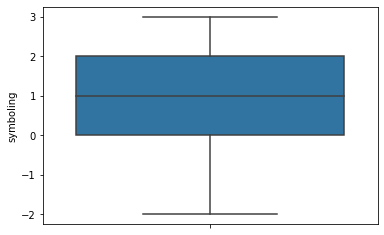

In [334]:
sns.boxplot(y=df_cars.symboling)
#>0 is risky and <0 is safer

In [335]:
df_cars.symboling.value_counts()/df_cars.symboling.count()*100

 0    32.820513
 1    26.666667
 2    15.897436
 3    11.794872
-1    11.282051
-2     1.538462
Name: symboling, dtype: float64

In [336]:
df_cars.describe(include='all')

,symboling,losses,makes,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_loc,wheel_base,...,engine_size,fuel_system,bore,stroke,comp_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195,195,195,195,195,195,195,195.000000,...,195.000000,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,NaN,NaN,21,2,2,3,5,3,2,NaN,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,175,159,112,94,116,192,NaN,...,NaN,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.794872,121.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.896410,...,127.938462,NaN,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,32.231252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.132038,...,41.433916,NaN,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,96.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,121.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,135.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,145.500000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000


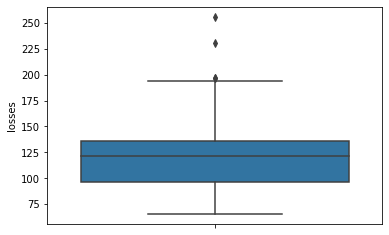

In [337]:
sns.boxplot(y=df_cars.losses)

In [338]:
#deleting the outliers. There are only 2 rows

In [339]:
df_cars.drop(df_cars.loc[df_cars.losses > df_cars.losses.mean()+df_cars.losses.std()*3].index,inplace=True)

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


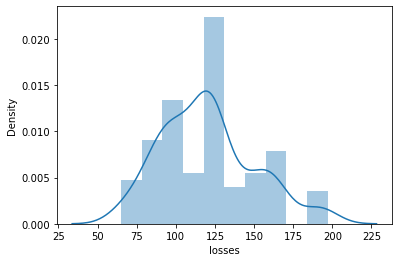

In [340]:
sns.distplot(df_cars.losses)
#losses are normally distributed

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


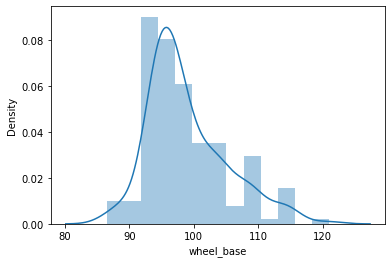

In [341]:
sns.distplot(df_cars.wheel_base)

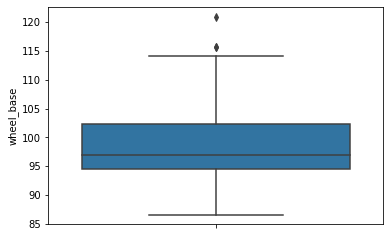

In [342]:
sns.boxplot(y=df_cars.wheel_base)

In [343]:
df_cars.describe()

,symboling,losses,wheel_base,len,width,height,curb_weight,engine_size,bore,stroke,comp_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.782383,120.033679,98.917617,174.279275,65.885492,53.895855,2557.746114,127.761658,3.329585,3.249430,10.209948,103.046632,5096.891192,25.414508,30.880829,13238.259067
std,1.226572,29.847698,6.155646,12.522280,2.134293,2.383577,525.210407,41.449834,0.272996,0.315557,4.080439,37.832869,469.752454,6.417278,6.850433,8086.200066
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,20.000000,25.000000,7738.000000
50%,1.000000,121.300000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,134.000000,102.400000,184.600000,66.900000,55.700000,2935.000000,145.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.000000,16503.000000
max,3.000000,197.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


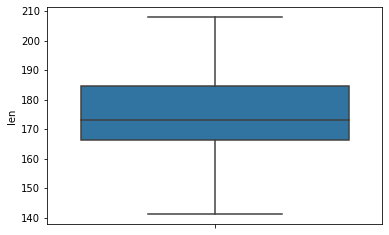

In [344]:
sns.boxplot(y=df_cars['len'])
#does not have any outliers

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


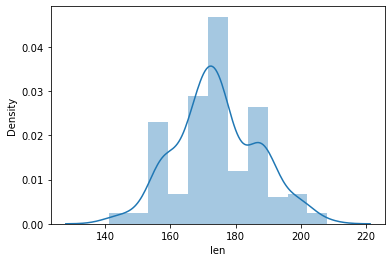

In [345]:
sns.distplot(df_cars['len'])


C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


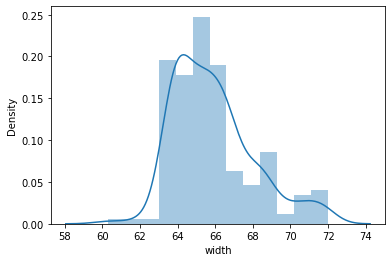

In [346]:
sns.distplot(df_cars['width'])

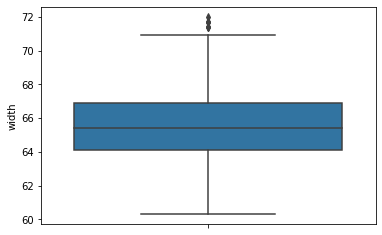

In [347]:
sns.boxplot(y=df_cars['width'])

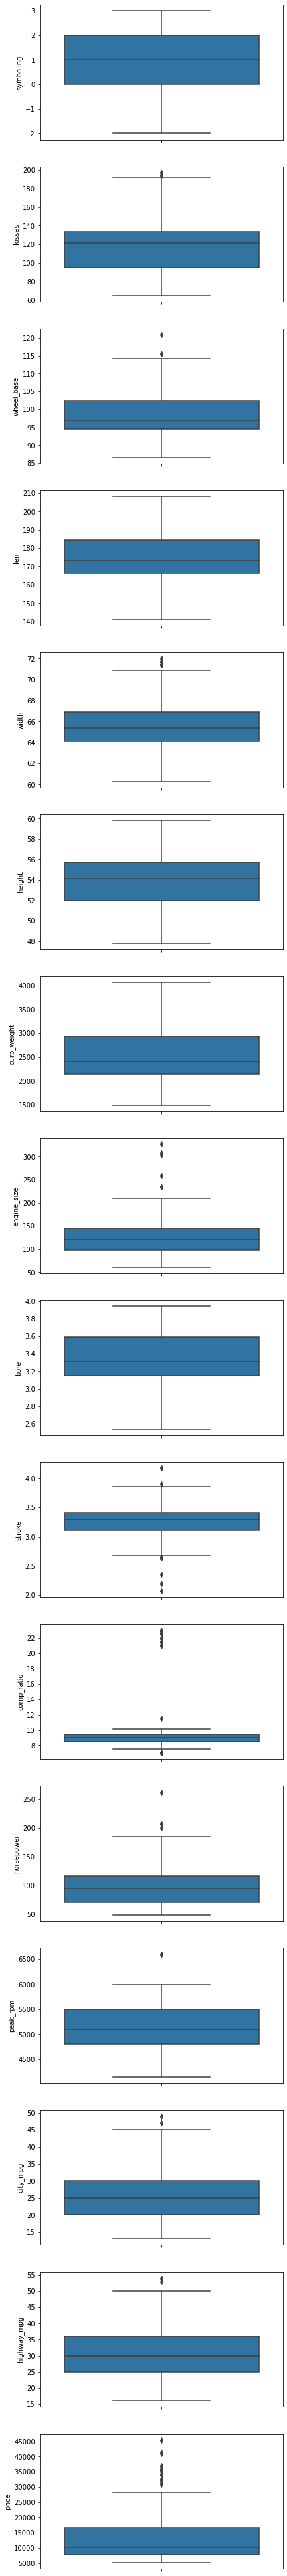

In [348]:
#create boxplots for all numeric features
cols = df_cars.describe().columns
fig,axes = plt.subplots(len(df_cars.describe().columns),1)
fig.set_size_inches(6.5, 70.5, forward=True)
for i in range(0,len(cols)):
    sns.boxplot( y=df_cars[cols[i]],ax=axes[i])


C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


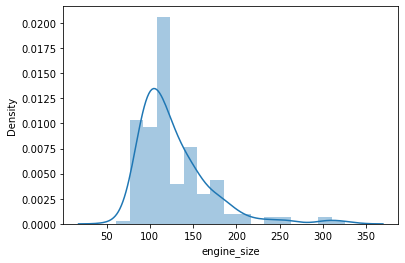

In [349]:
sns.distplot(df_cars['engine_size'])

In [350]:
#engine size outliers
IQR = df_cars['engine_size'].quantile(0.75)-df_cars['engine_size'].quantile(0.25)

In [351]:
lower = df_cars['engine_size'].quantile(0.25) - 3*IQR
upper = df_cars['engine_size'].quantile(0.75) + 3*IQR
df_cars.drop(df_cars.loc[~((df_cars.engine_size>lower) & (df_cars.engine_size<upper))].index,inplace=True)


In [352]:
#peak_rpm
IQR = df_cars['peak_rpm'].quantile(0.75)-df_cars['peak_rpm'].quantile(0.25)
lower = df_cars['peak_rpm'].quantile(0.25) - 1.5*IQR
upper = df_cars['peak_rpm'].quantile(0.75) + 1.5*IQR
df_cars.drop(df_cars.loc[~((df_cars.peak_rpm>lower) & (df_cars.peak_rpm<upper))].index,inplace=True)


C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


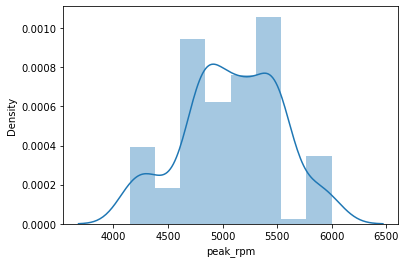

In [353]:
sns.distplot(df_cars.peak_rpm)

In [354]:
#bivariate analysis between quantitative data
df_cars.corr()

,symboling,losses,wheel_base,len,width,height,curb_weight,engine_size,bore,stroke,comp_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.455347,-0.549835,-0.361908,-0.243959,-0.534239,-0.223878,-0.046348,-0.138172,-0.020259,-0.179434,0.102268,0.230517,0.003974,0.075050,-0.070830
losses,0.455347,1.000000,-0.028641,0.043992,0.118285,-0.338244,0.119215,0.174413,-0.026612,0.058640,-0.104674,0.224709,0.170963,-0.205590,-0.154397,0.163594
wheel_base,-0.549835,-0.028641,1.000000,0.872928,0.811098,0.614610,0.777472,0.541391,0.472991,0.174758,0.274895,0.344191,-0.324665,-0.478670,-0.547023,0.544693
len,-0.361908,0.043992,0.872928,1.000000,0.849141,0.525965,0.876381,0.683937,0.590498,0.127414,0.176515,0.562033,-0.257754,-0.675098,-0.704708,0.670341
width,-0.243959,0.118285,0.811098,0.849141,1.000000,0.351887,0.852955,0.709868,0.520289,0.207204,0.215254,0.579246,-0.207008,-0.625261,-0.672106,0.717610
height,-0.534239,-0.338244,0.614610,0.525965,0.351887,1.000000,0.354859,0.075379,0.192371,-0.082413,0.274322,-0.040251,-0.255313,-0.129253,-0.181710,0.164764
curb_weight,-0.223878,0.119215,0.777472,0.876381,0.852955,0.354859,1.000000,0.866964,0.632809,0.197475,0.173875,0.736514,-0.256679,-0.758647,-0.801549,0.820930
engine_size,-0.046348,0.174413,0.541391,0.683937,0.709868,0.075379,0.866964,1.000000,0.596655,0.287422,0.049881,0.838006,-0.175258,-0.722886,-0.736164,0.872104
bore,-0.138172,-0.026612,0.472991,0.590498,0.520289,0.192371,0.632809,0.596655,1.000000,-0.068688,0.010617,0.564589,-0.263761,-0.577994,-0.585920,0.526698
stroke,-0.020259,0.058640,0.174758,0.127414,0.207204,-0.082413,0.197475,0.287422,-0.068688,1.000000,0.206592,0.141279,-0.053898,-0.037694,-0.048871,0.115432


#### Analysing Corr Coff., it is evedent that below columns can be dropped as they are not interrelated with price
<br>symboling
<br>losses
<br>wheel_base
<br>height
<br>bore
<br>stroke
<br>comp_ratio
<br>peak_rpm


In [355]:
df_cars.drop(columns=['symboling','losses','wheel_base','height','bore','stroke','comp_ratio','peak_rpm'],inplace=True,axis=1)

In [356]:
df_cars.head()

,makes,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_loc,len,width,curb_weight,engine_type,num_cyl,engine_size,fuel_system,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,111,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,111,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,154,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,102,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,115,18,22,17450.0


#### We figured out that only drive_wheel is related to price and can be a pridictor of price thus dropping other variables


In [357]:
df_cars.drop(columns=['makes','fuel_type','num_doors','body_style','engine_loc','engine_type','num_cyl','fuel_system'],inplace=True,axis=1)

In [358]:
df_cars.head()


,aspiration,drive_wheels,len,width,curb_weight,engine_size,horsepower,city_mpg,highway_mpg,price
0,std,rwd,168.8,64.1,2548,130,111,21,27,13495.0
1,std,rwd,168.8,64.1,2548,130,111,21,27,16500.0
2,std,rwd,171.2,65.5,2823,152,154,19,26,16500.0
3,std,fwd,176.6,66.2,2337,109,102,24,30,13950.0
4,std,4wd,176.6,66.4,2824,136,115,18,22,17450.0


In [359]:
#one hot encoding
drive_wheels = pd.get_dummies(df_cars.drive_wheels)

In [360]:
df_cars = pd.concat([df_cars,drive_wheels],axis=1)

In [361]:
df_cars.head()

,aspiration,drive_wheels,len,width,curb_weight,engine_size,horsepower,city_mpg,highway_mpg,price,4wd,fwd,rwd
0,std,rwd,168.8,64.1,2548,130,111,21,27,13495.0,0,0,1
1,std,rwd,168.8,64.1,2548,130,111,21,27,16500.0,0,0,1
2,std,rwd,171.2,65.5,2823,152,154,19,26,16500.0,0,0,1
3,std,fwd,176.6,66.2,2337,109,102,24,30,13950.0,0,1,0
4,std,4wd,176.6,66.4,2824,136,115,18,22,17450.0,1,0,0


In [362]:
df_cars.drop(columns=['drive_wheels','aspiration'],axis=1,inplace=True)

In [363]:
df_cars.head()

,len,width,curb_weight,engine_size,horsepower,city_mpg,highway_mpg,price,4wd,fwd,rwd
0,168.8,64.1,2548,130,111,21,27,13495.0,0,0,1
1,168.8,64.1,2548,130,111,21,27,16500.0,0,0,1
2,171.2,65.5,2823,152,154,19,26,16500.0,0,0,1
3,176.6,66.2,2337,109,102,24,30,13950.0,0,1,0
4,176.6,66.4,2824,136,115,18,22,17450.0,1,0,0


### Linear Regression  Modelling
Simple Linear Regression

In [364]:
df_cars.columns

Index(['len', 'width', 'curb_weight', 'engine_size', 'horsepower', 'city_mpg',
       'highway_mpg', 'price', '4wd', 'fwd', 'rwd'],
      dtype='object')

In [365]:
df_cars

,len,width,curb_weight,engine_size,horsepower,city_mpg,highway_mpg,price,4wd,fwd,rwd
0,168.8,64.1,2548,130,111,21,27,13495.0,0,0,1
1,168.8,64.1,2548,130,111,21,27,16500.0,0,0,1
2,171.2,65.5,2823,152,154,19,26,16500.0,0,0,1
3,176.6,66.2,2337,109,102,24,30,13950.0,0,1,0
4,176.6,66.4,2824,136,115,18,22,17450.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
190,188.8,68.9,2952,141,114,23,28,16845.0,0,0,1
191,188.8,68.8,3049,141,160,19,25,19045.0,0,0,1
192,188.8,68.9,3012,173,134,18,23,21485.0,0,0,1
193,188.8,68.9,3217,145,106,26,27,22470.0,0,0,1


In [370]:
df_cars[['4wd','fwd','rwd']]

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
190,0,0,1
191,0,0,1
192,0,0,1
193,0,0,1


In [390]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['len', 'width', 'curb_weight', 'engine_size', 'horsepower', 'city_mpg',
       'highway_mpg', 'price']
df_cars.reset_index()
df_cars_scaled = scaler.fit_transform(df_cars[columns])
df_cars_scaled = pd.DataFrame(df_cars_scaled,columns=columns)
df_cars_scaled = pd.DataFrame(np.hstack([df_cars_scaled,df_cars[['4wd','fwd','rwd']]]),columns=df_cars.columns)
df_cars_scaled.head()

,len,width,curb_weight,engine_size,horsepower,city_mpg,highway_mpg,price,4wd,fwd,rwd
0,-0.420990,-0.846667,0.015940,0.141169,0.275529,-0.728335,-0.619942,0.089133,0.0,0.0,1.0
1,-0.420990,-0.846667,0.015940,0.141169,0.275529,-0.728335,-0.619942,0.497617,0.0,0.0,1.0
2,-0.224170,-0.156324,0.562051,0.778585,1.490021,-1.045295,-0.769941,0.497617,0.0,0.0,1.0
3,0.218674,0.188848,-0.403077,-0.467274,0.021333,-0.252894,-0.169946,0.150983,0.0,1.0,0.0
4,0.218674,0.287468,0.564037,0.315009,0.388505,-1.203775,-1.369937,0.626755,1.0,0.0,0.0


In [400]:
#implement simple linear regression between length and price
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Y = df_cars_scaled[['price']]
X = df_cars_scaled.drop(['price'],axis=1)
model = LinearRegression()
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)
model.fit(X_train,Y_train)

LinearRegression()

In [402]:
model.intercept_[0]

0.045969723344738006

In [403]:
model.coef_

array([[-0.06693555,  0.1976321 ,  0.14598957,  0.48936901,  0.22035845,
        -0.15357485,  0.22066276,  0.06806669, -0.11566574,  0.04759904]])

In [405]:
#we found coeff. and intercept, lets now to predictions
predictions = model.predict(X_test)

In [406]:
predictions

array([[ 0.76474635],
       [-0.43420483],
       [ 0.23710005],
       [-0.65998935],
       [-0.98724701],
       [-0.65911961],
       [-0.93022695],
       [ 0.23433109],
       [-0.51106715],
       [-0.89401404],
       [-0.31883961],
       [ 0.23360233],
       [ 0.63586981],
       [ 0.30282761],
       [-0.95564725],
       [-0.8198353 ],
       [-0.54587945],
       [-0.44902362],
       [-0.15617032],
       [ 0.81112104],
       [-0.67298902],
       [-1.76989752],
       [ 2.05410501],
       [-0.23860931],
       [-0.67599015],
       [ 1.17249783],
       [-0.23860931],
       [-0.72938261],
       [ 0.65758115],
       [-0.46534935],
       [-0.57286912],
       [ 2.96927426],
       [-0.30907248],
       [-0.22216102],
       [-0.95419768],
       [-0.31883961],
       [-0.92381809],
       [ 0.53185808],
       [-0.56052755],
       [-0.45333922],
       [ 0.67974984],
       [ 0.72635338],
       [-0.92845673],
       [-0.97252596],
       [ 1.5604643 ],
       [-0

In [407]:
Y_test

,price
106,0.721909
170,-0.590541
102,0.524124
166,-0.688414
19,-0.851536
168,-0.658508
82,-0.814290
58,0.748280
126,-0.711795
88,-0.623981


### Model Evaluation

In [429]:
residuals = Y_test - predictions

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


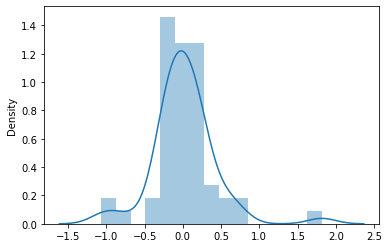

In [430]:
sns.distplot(residuals)

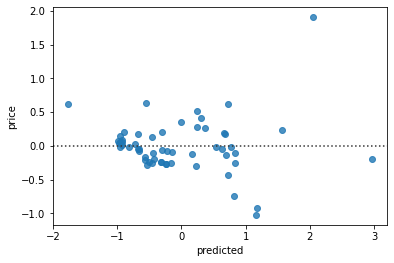

In [432]:
df = pd.DataFrame(np.hstack([Y_test,pd.DataFrame(predictions,columns=['predicted']),residuals]),columns=['actuals','predicted','residuals'])
sns.residplot(x =df.predicted,
              y = residuals)

In [434]:
df.corr()

,actuals,predicted,residuals
actuals,1.000000,0.893931,0.351295
predicted,0.893931,1.000000,-0.105605
residuals,0.351295,-0.105605,1.000000


### Model is unbiased and looks good as there is no correlation between residuals and predicted values

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhishek\anaconda3\l

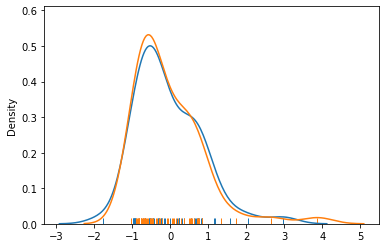

In [435]:
#distribution Plot

sns.distplot(df[['predicted']], hist=False, rug=True)
sns.distplot(df[['actuals']], hist=False, rug=True)

plt.show()